# Installation

In [39]:
# run this cell to install pycaret in Google Colab
# !pip install pycaret==2.3.5 -qq  

# !pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq  # <--- 얘는 에러난다
# !pip install pycaret[full] -qq # <--- 얘는 에러난다
# If you are using Jupyter notebook, you can pip install pycaret using jupyter notebook or command line
# pip install pycaret

In [40]:
# !pip uninstall pycaret --yes #  삭제하기
# --yes Proceed (y/n)? 
# !pip install [설치하고자 하는 패키지명] --yes

In [41]:
# !python --version #Python 3.7.13

In [42]:
from pycaret.utils import version
version()

'2.3.10'

In [43]:
# !pip install markupsafe==2.0.1

```
# 코드로 형식 지정됨
```

# 1. Importing Dataset

In [53]:
from pycaret.datasets import get_data
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1070 non-null   int64  
 1   Purchase        1070 non-null   object 
 2   WeekofPurchase  1070 non-null   int64  
 3   StoreID         1070 non-null   int64  
 4   PriceCH         1070 non-null   float64
 5   PriceMM         1070 non-null   float64
 6   DiscCH          1070 non-null   float64
 7   DiscMM          1070 non-null   float64
 8   SpecialCH       1070 non-null   int64  
 9   SpecialMM       1070 non-null   int64  
 10  LoyalCH         1070 non-null   float64
 11  SalePriceMM     1070 non-null   float64
 12  SalePriceCH     1070 non-null   float64
 13  PriceDiff       1070 non-null   float64
 14  Store7          1070 non-null   object 
 15  PctDiscMM       1070 non-null   float64
 16  PctDiscCH       1070 non-null   float64
 17  ListPriceDiff   1070 non-null   f

In [56]:
print('Purchase: ',set(data.Purchase))
print('Store7: ', set(data.Store7))

Purchase:  {'MM', 'CH'}
Store7:  {'Yes', 'No'}


In [57]:
# 범주형 데이터 확인

## 범주형 데이터 확인

In [58]:
# 범주형 데이터 확인
# SpecialCH, SpecialMM
cat_cols = ['Purchase','Store7','STORE', 'StoreID', 'SpecialCH', 'SpecialMM']
for col in cat_cols:
    print(f'{col}: ',set(data[col]))

Purchase:  {'MM', 'CH'}
Store7:  {'Yes', 'No'}
STORE:  {0, 1, 2, 3, 4}
StoreID:  {1, 2, 3, 4, 7}
SpecialCH:  {0, 1}
SpecialMM:  {0, 1}


In [59]:
data.to_csv('./Orange_Juice.csv')

# 2. Setting up Environment

In [60]:
# !pip install Jinja2

In [61]:
from pycaret.classification import *
clf1 = setup(data, target = 'Purchase', session_id=786)

,Description,Value
0,session_id,786
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


# 3. Compare Models

In [62]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8315,0.8954,0.7846,0.7904,0.7855,0.6470,0.6491,0.0150
ridge,Ridge Classifier,0.8289,0.0000,0.7745,0.7935,0.7807,0.6408,0.6443,0.0020
lda,Linear Discriminant Analysis,0.8276,0.9054,0.7711,0.7928,0.7788,0.6379,0.6412,0.0020
lr,Logistic Regression,0.8235,0.9054,0.7472,0.7981,0.7686,0.6266,0.6306,0.0130
gbc,Gradient Boosting Classifier,0.8168,0.8965,0.7540,0.7793,0.7621,0.6139,0.6183,0.0170
lightgbm,Light Gradient Boosting Machine,0.7955,0.8839,0.7441,0.7436,0.7404,0.5722,0.5757,0.0080
rf,Random Forest Classifier,0.7848,0.8714,0.7233,0.7323,0.7246,0.5484,0.5515,0.0520
nb,Naive Bayes,0.7714,0.8427,0.7854,0.6833,0.7284,0.5333,0.5401,0.0020
et,Extra Trees Classifier,0.7634,0.8458,0.6963,0.7023,0.6964,0.5030,0.5058,0.0460
dt,Decision Tree Classifier,0.7528,0.7489,0.7033,0.6862,0.6921,0.4863,0.4888,0.0030


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=786)

# 4. Create Model

In [63]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8522,0.6667,0.8000,0.7273,0.5714,0.5774
1,0.8400,0.9067,0.8333,0.7812,0.8065,0.6703,0.6713
2,0.8533,0.9593,0.8000,0.8276,0.8136,0.6927,0.6930
3,0.8533,0.9078,0.7931,0.8214,0.8070,0.6888,0.6891
4,0.8267,0.8741,0.7931,0.7667,0.7797,0.6369,0.6371
5,0.7200,0.8546,0.7241,0.6176,0.6667,0.4279,0.4319
6,0.8533,0.9558,0.7931,0.8214,0.8070,0.6888,0.6891
7,0.8400,0.8846,0.7241,0.8400,0.7778,0.6538,0.6582
8,0.8378,0.9341,0.6552,0.9048,0.7600,0.6422,0.6613


In [64]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6800,0.6778,0.6667,0.5882,0.6250,0.3478,0.3499
1,0.8000,0.7926,0.6667,0.8000,0.7273,0.5714,0.5774
2,0.7333,0.7530,0.7000,0.6562,0.6774,0.4505,0.4512
3,0.7867,0.7751,0.7241,0.7241,0.7241,0.5502,0.5502
4,0.6800,0.6852,0.7241,0.5676,0.6364,0.3581,0.3665
5,0.7333,0.7286,0.7241,0.6364,0.6774,0.4518,0.4545
6,0.7200,0.7080,0.6552,0.6333,0.6441,0.4134,0.4136
7,0.8133,0.8096,0.7931,0.7419,0.7667,0.6114,0.6123
8,0.8108,0.7893,0.6897,0.8000,0.7407,0.5931,0.5971


# 5. Tune Model

In [65]:
# tune_model pycare 
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.8244,0.7667,0.7667,0.7667,0.6111,0.6111
1,0.8133,0.8678,0.9000,0.7105,0.7941,0.6277,0.6424
2,0.8133,0.8511,0.9667,0.6905,0.8056,0.6354,0.6689
3,0.8400,0.8475,0.8621,0.7576,0.8065,0.6711,0.6751
4,0.7867,0.8025,0.7931,0.6970,0.7419,0.5614,0.5648
5,0.7733,0.8186,0.8276,0.6667,0.7385,0.5425,0.5524
6,0.8533,0.8347,0.9655,0.7368,0.8358,0.7076,0.7287
7,0.8800,0.8816,0.8621,0.8333,0.8475,0.7486,0.7489
8,0.8514,0.8418,0.7586,0.8462,0.8000,0.6823,0.6849


In [66]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=786, splitter='best')


In [67]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7600,0.7589,0.6667,0.7143,0.6897,0.4944,0.4952
1,0.7600,0.8296,0.7333,0.6875,0.7097,0.5055,0.5063
2,0.8133,0.9252,0.8333,0.7353,0.7812,0.6196,0.6233
3,0.7467,0.8726,0.8621,0.6250,0.7246,0.5009,0.5232
4,0.7067,0.8193,0.7586,0.5946,0.6667,0.4116,0.4213
5,0.8133,0.8171,0.8621,0.7143,0.7813,0.6209,0.6293
6,0.8000,0.8808,0.8966,0.6842,0.7761,0.6012,0.6192
7,0.7867,0.8381,0.7241,0.7241,0.7241,0.5502,0.5502
8,0.7703,0.8598,0.7586,0.6875,0.7213,0.5267,0.5286


In [68]:
tuned_nb = tune_model(nb, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.7804,0.6333,0.6786,0.6552,0.4382,0.4389
1,0.7867,0.8393,0.7333,0.7333,0.7333,0.5556,0.5556
2,0.8133,0.9311,0.8333,0.7353,0.7812,0.6196,0.6233
3,0.7467,0.8741,0.7931,0.6389,0.7077,0.4887,0.4976
4,0.7333,0.8148,0.7931,0.6216,0.6970,0.4650,0.4761
5,0.8000,0.8163,0.8621,0.6944,0.7692,0.5963,0.6072
6,0.8000,0.8891,0.8276,0.7059,0.7619,0.5914,0.5969
7,0.7733,0.8321,0.7241,0.7000,0.7119,0.5251,0.5253
8,0.7838,0.8598,0.7586,0.7097,0.7333,0.5519,0.5527


In [69]:
print(tuned_nb)

GaussianNB(priors=None, var_smoothing=1e-05)


# 6. Ensemble Model

In [70]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.8059,0.7000,0.6562,0.6774,0.4505,0.4512
1,0.7867,0.8763,0.6333,0.7917,0.7037,0.5402,0.5484
2,0.8800,0.9263,0.8333,0.8621,0.8475,0.7486,0.7489
3,0.7867,0.8523,0.7241,0.7241,0.7241,0.5502,0.5502
4,0.7733,0.8276,0.8276,0.6667,0.7385,0.5425,0.5524
5,0.7467,0.7976,0.7241,0.6562,0.6885,0.4759,0.4775
6,0.8000,0.8936,0.7241,0.7500,0.7368,0.5756,0.5759
7,0.8267,0.8568,0.7241,0.8077,0.7636,0.6274,0.6298
8,0.8378,0.8839,0.6552,0.9048,0.7600,0.6422,0.6613


In [71]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7067,0.7574,0.7000,0.6176,0.6562,0.4022,0.4046
1,0.8000,0.8885,0.6667,0.8000,0.7273,0.5714,0.5774
2,0.8133,0.8581,0.7667,0.7667,0.7667,0.6111,0.6111
3,0.7733,0.8370,0.6897,0.7143,0.7018,0.5190,0.5193
4,0.8000,0.8564,0.8621,0.6944,0.7692,0.5963,0.6072
5,0.7467,0.8193,0.7586,0.6471,0.6984,0.4824,0.4869
6,0.8133,0.7950,0.7931,0.7419,0.7667,0.6114,0.6123
7,0.8400,0.8392,0.7931,0.7931,0.7931,0.6627,0.6627
8,0.8378,0.8904,0.7241,0.8400,0.7778,0.6512,0.6557


# 7. Blend Models

In [72]:
lr = create_model('lr', verbose=False)
lda = create_model('lda', verbose=False)
gbc = create_model('gbc', verbose=False)

In [73]:
blender = blend_models(estimator_list=[lr,lda,gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8567,0.6667,0.8000,0.7273,0.5714,0.5774
1,0.8667,0.9089,0.8667,0.8125,0.8387,0.7253,0.7264
2,0.8800,0.9556,0.8333,0.8621,0.8475,0.7486,0.7489
3,0.8533,0.9198,0.7931,0.8214,0.8070,0.6888,0.6891
4,0.8400,0.8831,0.8276,0.7742,0.8000,0.6669,0.6679
5,0.7467,0.8501,0.7241,0.6562,0.6885,0.4759,0.4775
6,0.8400,0.9453,0.8276,0.7742,0.8000,0.6669,0.6679
7,0.8400,0.9010,0.7586,0.8148,0.7857,0.6583,0.6594
8,0.8784,0.9441,0.7241,0.9545,0.8235,0.7334,0.7497


In [74]:
blender.estimators_

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='dep

# 8. Analyze Model

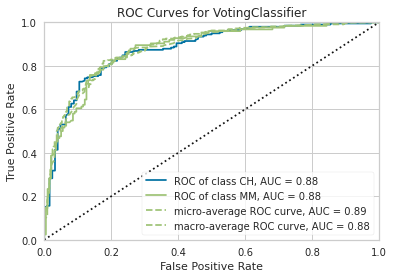

In [75]:
plot_model(blender)

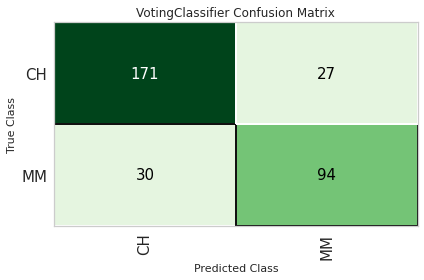

In [76]:
plot_model(blender, plot = 'confusion_matrix')

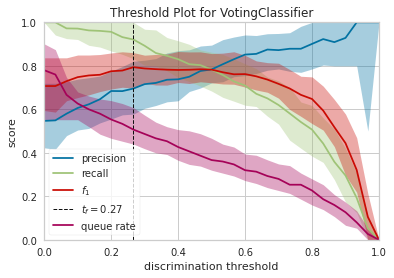

In [77]:
plot_model(blender, plot = 'threshold')

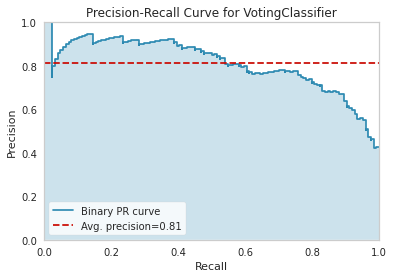

In [78]:
plot_model(blender, plot = 'pr')

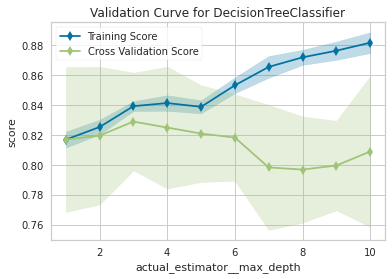

In [79]:
plot_model(tuned_dt, plot = 'vc')

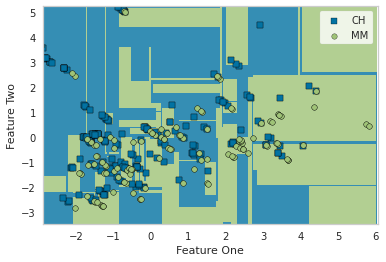

In [80]:
plot_model(dt, plot = 'boundary')

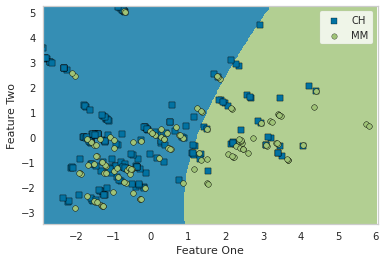

In [81]:
plot_model(tuned_nb, plot = 'boundary')

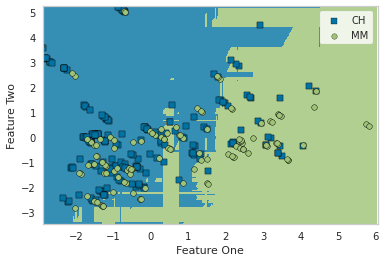

In [82]:
plot_model(blender, plot = 'boundary')

In [83]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 9. Interpret Model

In [84]:
# https://pycaret.readthedocs.io/en/latest/api/classification.html

In [85]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7467,0.8381,0.7000,0.6774,0.6885,0.4751,0.4753
1,0.8267,0.9163,0.7667,0.7931,0.7797,0.6369,0.6371
2,0.8000,0.9104,0.7333,0.7586,0.7458,0.5810,0.5812
3,0.7867,0.8763,0.8276,0.6857,0.7500,0.5668,0.5744
4,0.8000,0.8756,0.7931,0.7188,0.7541,0.5862,0.5883
5,0.7600,0.8276,0.7586,0.6667,0.7097,0.5066,0.5097
6,0.7867,0.8928,0.7931,0.6970,0.7419,0.5614,0.5648
7,0.8400,0.8793,0.7586,0.8148,0.7857,0.6583,0.6594
8,0.8243,0.9287,0.6552,0.8636,0.7451,0.6149,0.6286


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


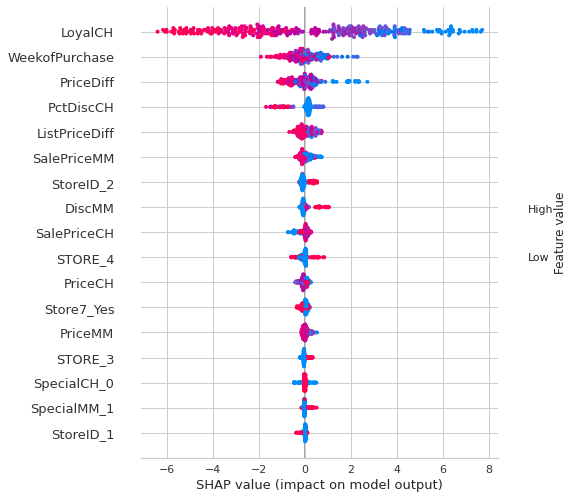

In [87]:
interpret_model(lightgbm)

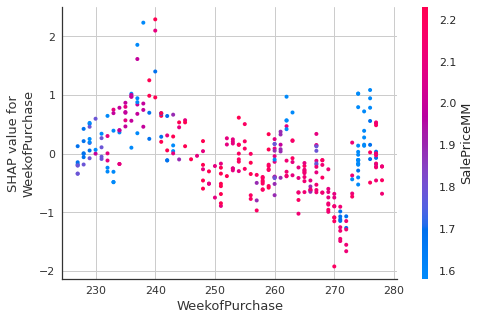

In [88]:
interpret_model(lightgbm, plot = 'correlation')

In [90]:
interpret_model(lightgbm, plot = 'reason', observation=1)

In [91]:
interpret_model(lightgbm, plot = 'reason')

# Learning Resources:

- PyCaret Classification Module : https://www.pycaret.org/classification
- Binary Classification Tutorial (Level Beginner) : https://pycaret.org/clf101/
- Binary Classification Tutorial (Level Intermediate) : https://pycaret.org/clf102/
- Kaggle Titanic Predictions (Video Tutorial) : https://www.youtube.com/watch?v=nqMM6rngNCA